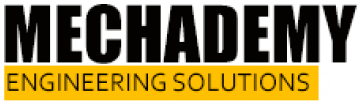

## Used Cars Price Prediction and Evaluation

Import Libraries

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Read dataset

In [2]:
dataset = pd.read_csv("cars_price.csv")
dataset.head(5)

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


Checking data for correlation

<AxesSubplot:>

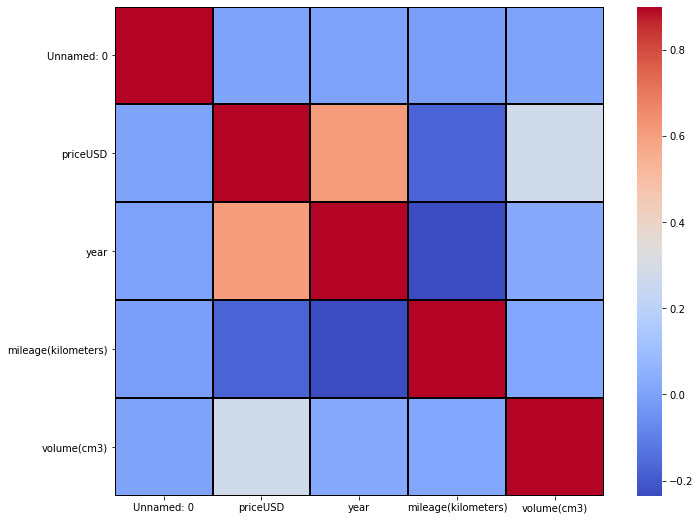

In [3]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, cmap='coolwarm', linecolor='black', linewidths=1, square=True)

The distribution of a univariate dataset.

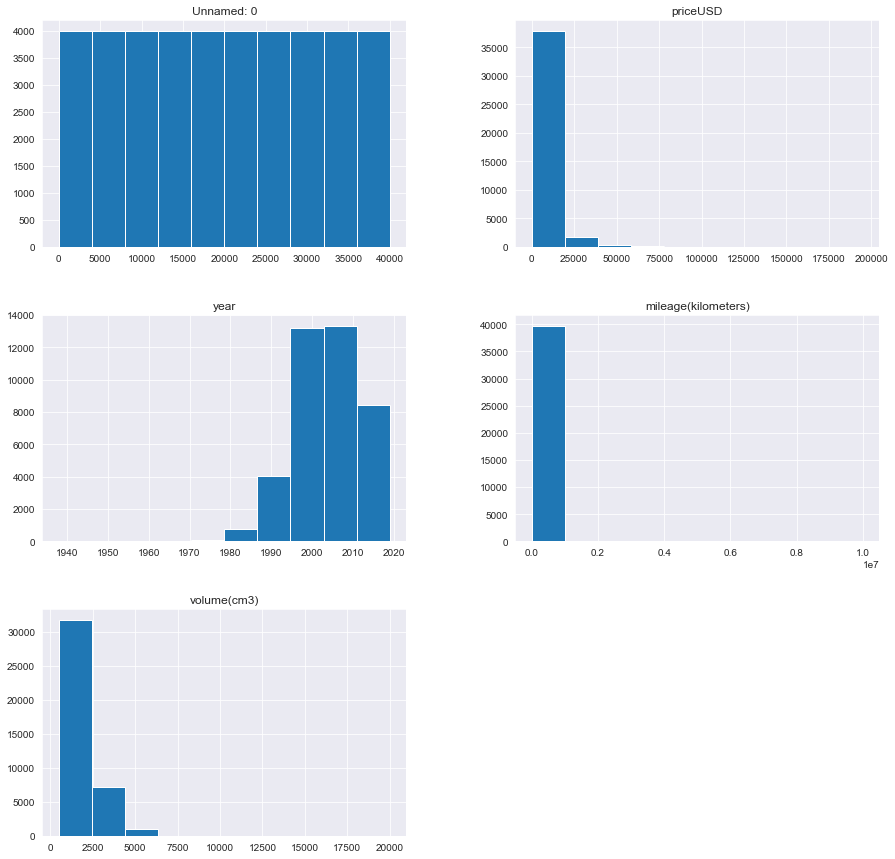

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

dataset.hist(figsize = (15,15))
plt.show()

Split the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### Data Exploratory Analysis

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 38015 to 15795
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28000 non-null  int64  
 1   make                 28000 non-null  object 
 2   model                28000 non-null  object 
 3   priceUSD             28000 non-null  int64  
 4   year                 28000 non-null  int64  
 5   condition            28000 non-null  object 
 6   mileage(kilometers)  28000 non-null  float64
 7   fuel_type            28000 non-null  object 
 8   volume(cm3)          27978 non-null  float64
 9   color                28000 non-null  object 
 10  transmission         28000 non-null  object 
 11  drive_unit           27048 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.8+ MB


The first column is the index for each data point and hence we can simply remove it.

In [7]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
X_train = X_train.drop(['drive_unit'], axis=1)
X_test = X_test.drop(['drive_unit'], axis=1)

In [8]:
#checking the number of features in the Dataset
print("\n\n Number of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, len(X_train.columns))
print("\nTest Set : \n",'-' * 20,len(X_test.columns))



 Number of features in the datasets :
 ########################################

Training Set : 
 -------------------- 10

Test Set : 
 -------------------- 10


In [9]:
#checking the features in the Dataset
print("\n\n Features in the dataset :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, list(X_train.columns))
print("\nTest Set : \n",'-' * 20,list(X_test.columns))



 Features in the dataset :
 ########################################

Training Set : 
 -------------------- ['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color', 'transmission']

Test Set : 
 -------------------- ['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color', 'transmission']


In [10]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", X_train.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",X_test.dtypes)



Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
dtype: object

Test Set : 
 -------------------- 
 make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
dtype: object


In [11]:
#checking the number of rows
print("\n\nNumber of observations in the dataset :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,len(X_train))
print("\nTest Set : \n",'-' * 20,len(X_test))



Number of observations in the dataset :
 ########################################

Training Set : 
 -------------------- 28000

Test Set : 
 -------------------- 12000


In [12]:
#checking for empty cells
print("\n\nEmpty cells in the dataset :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,X_train.isnull().values.any())
print("\nTest Set : \n",'-' * 20,X_test.isnull().values.any())



Empty cells in the dataset :
 ########################################

Training Set : 
 -------------------- True

Test Set : 
 -------------------- True


In [13]:
#checking for empty cells by features
print("\n\nNumber of empty cells in the dataset :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", X_train.isnull().sum())
print("\nTest Set : \n",'-' * 20,"\n",X_test.isnull().sum())



Number of empty cells in the dataset :
 ########################################

Training Set : 
 -------------------- 
 make                    0
model                   0
priceUSD                0
year                    0
condition               0
mileage(kilometers)     0
fuel_type               0
volume(cm3)            22
color                   0
transmission            0
dtype: int64

Test Set : 
 -------------------- 
 make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            8
color                  0
transmission           0
dtype: int64


In [14]:
#combining training set and test set data
brands = list(X_train.make) + list(X_test.make)
models = list(X_train.model) + list(X_test.model)
fuel_types = list(X_train.fuel_type) + list(X_test.fuel_type)
transmissions = list(X_train.transmission) + list(X_test.transmission)
colors = list(X_train.color) + list(X_test.color)

In [15]:
print("\nNumber Of Unique Values In Make :  ", len(set(brands)))
print("\nNumber Of Unique Values In Models :  ", len(set(models)))
print("\nNumber Of Unique Values In Fuel_Type :  ", len(set(fuel_types)))
print("\nNumber Of Unique Values In Transmission :  ", len(set(transmissions)))
print("\nNumber Of Unique Values In Colors :  ", len(set(colors)))


Number Of Unique Values In Make :   93

Number Of Unique Values In Models :   991

Number Of Unique Values In Fuel_Type :   3

Number Of Unique Values In Transmission :   2

Number Of Unique Values In Colors :   13


Text(0, 0.5, 'Count of cars')

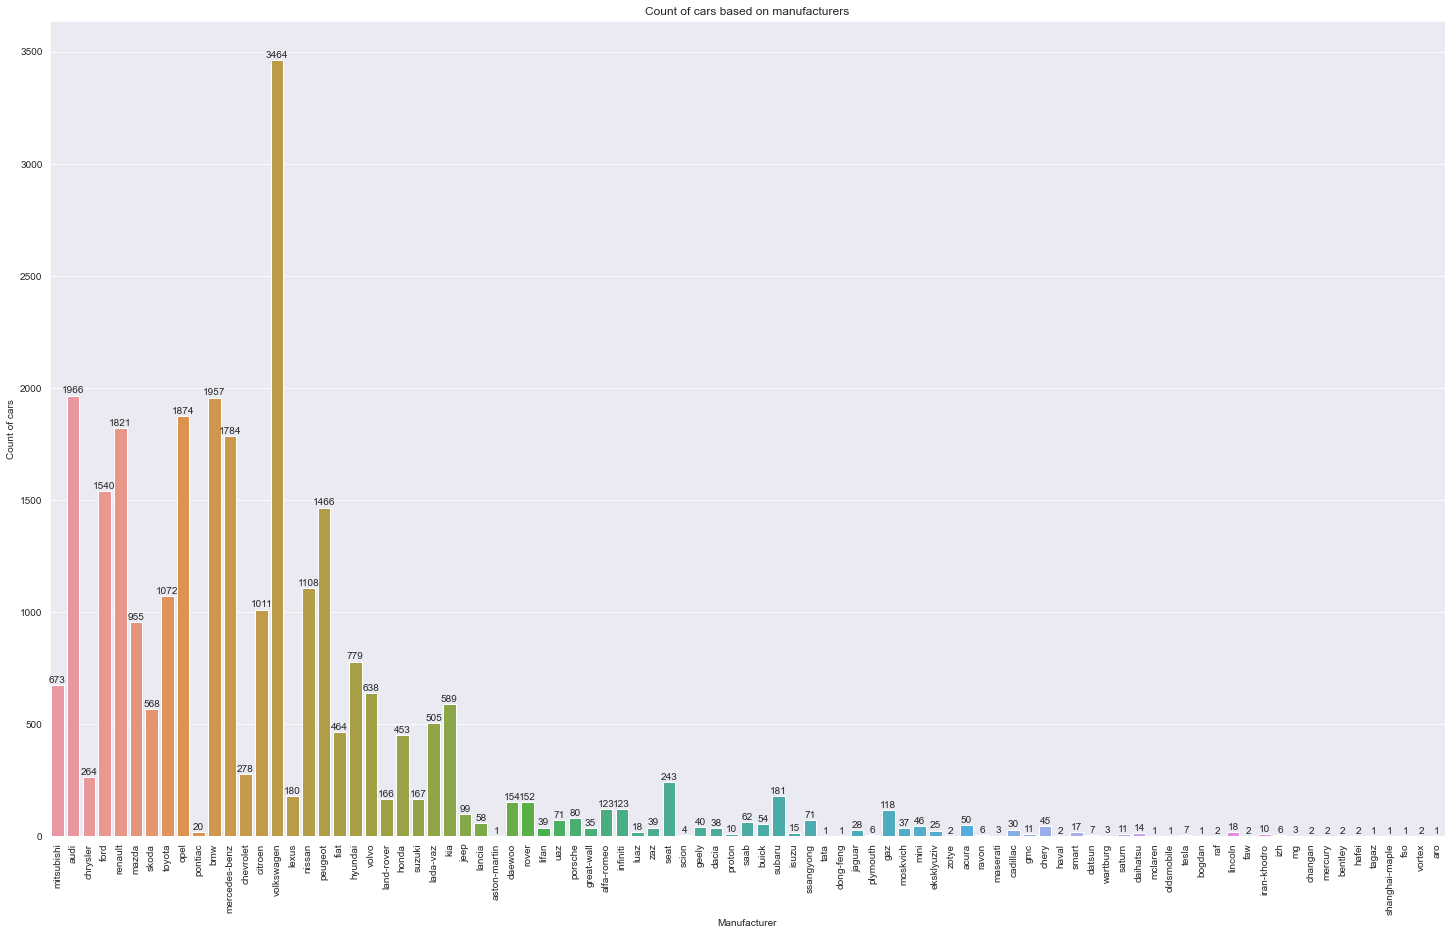

In [16]:
plt.figure(figsize = (25, 15))
plot = sns.countplot(x = 'make', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

C:\Users\promo\anaconda3\envs\cuda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\promo\anaconda3\envs\cuda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


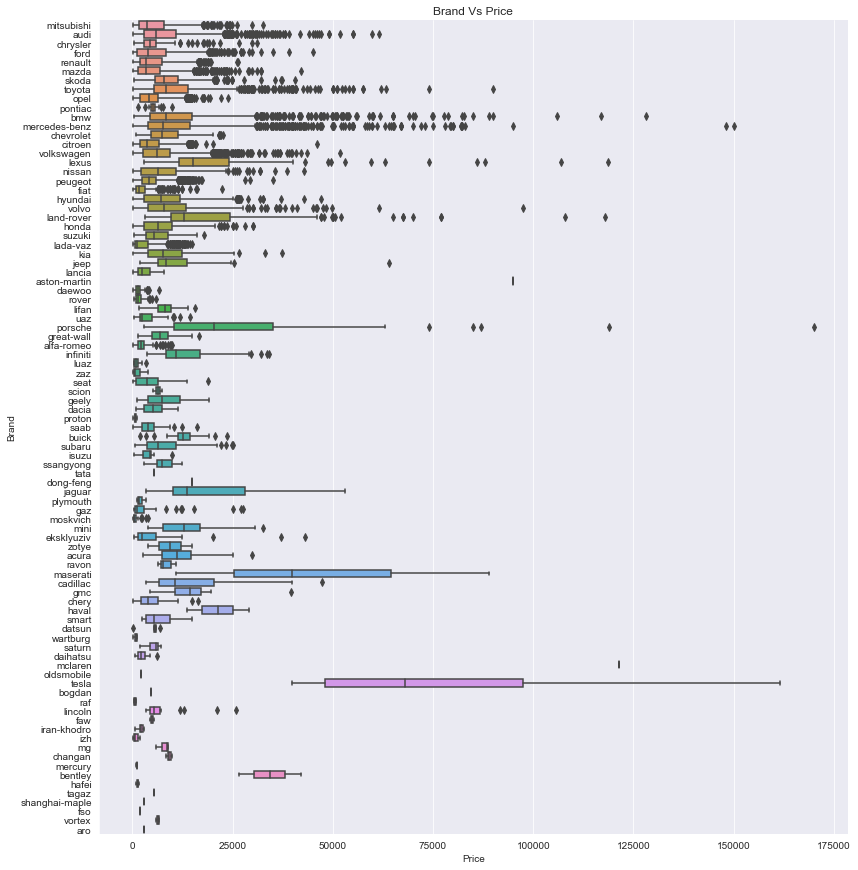

In [17]:
mx = sns.factorplot(x="priceUSD", y="make", data=X_train, kind="box", size=12, aspect=1)
mx.set(xlabel='Price')
mx.set(ylabel= 'Brand')
plt.title('Brand Vs Price');

Feature :
Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [18]:
curr_time = datetime.datetime.now()
X_train['year'] = X_train['year'].apply(lambda x : curr_time.year - x)
X_test['year'] = X_test['year'].apply(lambda x : curr_time.year - x)

Encoding Categorical Variables

In [19]:
#'make', 'model', 'year','fuel_type', 'transmission'

all_brands = list(set(list(X_train.make) + list(X_test.make)))
all_models = list(set(list(X_train.model) + list(X_test.model)))
all_years = list(set(list(X_train.year) + list(X_test.year)))
all_fuel_types = list(set(list(X_train.fuel_type) + list(X_test.fuel_type)))
all_conditions = list(set(list(X_train.condition) + list(X_test.condition)))
all_colors = list(set(list(X_train.color) + list(X_test.color)))
all_transmissions = list(set(list(X_train.transmission) + list(X_test.transmission)))

In [20]:
# Initializing label encoders and fitting the categories

from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_years = LabelEncoder()
le_fuel_types = LabelEncoder()
le_conditions = LabelEncoder()
le_colors = LabelEncoder()
le_transmissions = LabelEncoder()

#Fitting the categories

le_brands.fit(all_brands)
le_models.fit(all_models)
le_years.fit(all_years)
le_conditions.fit(all_conditions)
le_colors.fit(all_colors)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)

LabelEncoder()

In [21]:
# Transforming the data in training set and test_set

#Applying encoding to X_train data
X_train['make'] = le_brands.transform(X_train['make'])
X_train['model'] = le_models.transform(X_train['model'])
X_train['year'] = le_years.transform(X_train['year'])
X_train['condition'] = le_conditions.transform(X_train['condition'])
X_train['color'] = le_colors.transform(X_train['color'])
X_train['fuel_type'] = le_fuel_types.transform(X_train['fuel_type'])
X_train['transmission'] = le_transmissions.transform(X_train['transmission'])

In [22]:
#Applying encoding to X_test data

X_test['make'] = le_brands.transform(X_test['make'])
X_test['model'] = le_models.transform(X_test['model'])
X_test['year'] = le_years.transform(X_test['year'])
X_test['color'] = le_colors.transform(X_test['color'])
X_test['condition'] = le_conditions.transform(X_test['condition'])
X_test['fuel_type'] = le_fuel_types.transform(X_test['fuel_type'])
X_test['transmission'] = le_transmissions.transform(X_test['transmission'])

The training_set and test_set are converted to completely numerical datasets as shown below.

In [23]:
X_train.head(5)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission
38015,56,650,8200,16,2,288000.0,0,2500.0,10,1
2281,4,127,1300,29,2,279000.0,2,1800.0,4,0
36629,4,1,700,34,2,450000.0,2,2000.0,1,1
6087,14,463,3500,19,2,330000.0,0,2500.0,10,1
11792,24,608,3803,17,2,230000.0,0,2000.0,4,1


In [24]:
X_test.head(5)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission
32823,58,173,1550,23,2,290000.0,2,1600.0,3,1
16298,18,327,3450,10,2,218000.0,2,1000.0,11,1
28505,33,473,14699,8,2,126000.0,0,2500.0,1,0
6689,15,237,8300,5,2,106000.0,2,1600.0,11,0
26893,68,537,30898,16,2,323000.0,0,2197.0,0,1


Imputing Missing Values

In [25]:
# Dependent Variable
Y_train_data = X_train.iloc[:, 2].values

# Independent Variables
X_train_data = X_train.iloc[:,2 :].values

# Independent Variables for test Set
X_test = X_train.iloc[:,2:].values

In [26]:
from sklearn.impute import SimpleImputer

#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_train)
X_train_data = imputer.transform(X_train)

#Test_set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_test)
X_test = imputer.transform(X_test)

Splitting The Training Data Into Training And Validation Sets

In [27]:
from sklearn.model_selection import train_test_split

#Splitting the training set into Training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state = 1)

## Modelling And Predicting

Calculating Accuracy With RMLSE

In [28]:
# Score Calculation
def score(y_pred, y_true):
   error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
   score = 1 - error
   return score

In [29]:
#The actual recordings to be tested against
y_true = Y_val

Testing The Model On Validation Sets

In [30]:
#Initializing Linear regressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Fitting the regressor with training data
lr.fit(X_train,Y_train)

#Predicting the target(Price) for predictors in validation set X_val
Y_pred = lr.predict(X_val)

In [31]:
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
   if Y_pred[i] < 0:
       Y_pred[i] = 0

#Printing the score for validation sets
print("\n\n Linear Regression SCORE : ", score(Y_pred, y_true))



 Linear Regression SCORE :  0.9999999999999949


In [32]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

names = ['Linear_Regression_target0']
MSE = [mean_squared_error(Y_pred, Y_val)]
R2 = [r2_score(Y_pred, Y_val)]

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))

for name, model in models:

    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)
    
    mse = mean_squared_error(predictions, Y_val)
    r2= r2_score(predictions, Y_val)

    names.append(name)
    MSE.append(mse)
    R2.append(r2)

In [33]:
df2=pd.DataFrame({'1. Model':names,'3. R-squared':R2,'2. Mean Squared Error':MSE})
df2

,1. Model,3. R-squared,2. Mean Squared Error
0,Linear_Regression_target0,1.000000,3.746586e-22
1,KNN,0.989810,6.192247e+05
2,CART,0.999478,3.414422e+04
3,Bag_Re,0.998962,6.685810e+04
4,RandomForest,0.998160,1.185895e+05
5,ExtraTreesRegressor,0.999159,5.449138e+04
